# Airfare price prediction


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_excel("G:\Projects\Airfare price prediction\Datatrain.xlsx")


In [2]:
df = pd.DataFrame(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
#Creating list of catagory columns 
category = ['Airline','Source','Destination','Additional_Info']

In [6]:
# checking unique values in Airlines columns
for i in category:
    print(i, df[i].unique())
    print('-----------------------------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
-----------------------------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-----------------------------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
-----------------------------------------------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
-----------------------------------------------------


In [7]:
df.Date_of_Journey = df.Date_of_Journey.str.split('/')

In [8]:
df.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [9]:
df['Date'] = df.Date_of_Journey.str[0]
df['Month'] = df.Date_of_Journey.str[1]
df['Year'] = df.Date_of_Journey.str[2]

In [10]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [11]:
df = df.astype({'Route': str})

In [12]:
df.Route = df.Route.str.split('→')

In [13]:
df['City1'] = df.Route.str[0]
df['City2'] = df.Route.str[1]
df['City3'] = df.Route.str[2]
df['City4'] = df.Route.str[3]
df['City5'] = df.Route.str[4]
df['City6'] = df.Route.str[5]

In [14]:
#treating time column 

df.Dep_Time = df.Dep_Time.str.split(':')

In [15]:
df['Dep_Time_Hour'] = df.Dep_Time.str[0]
df['Dep_Time_Min'] = df.Dep_Time.str[1]

In [16]:
#Treating the arrival time column 

df.Arrival_Time = df.Arrival_Time.str.split(' ')

In [17]:
df['Arrival_date'] = df.Arrival_Time.str[1]

In [18]:
df['Time_Of_Arrival'] = df.Arrival_Time.str[0]

In [19]:
df['Time_Of_Arrival'] = df.Time_Of_Arrival.str.split(':')

In [20]:
df['Arrival_Time_Hour'] = df.Time_Of_Arrival.str[0]
df['Arrival_Time_Min'] = df.Time_Of_Arrival.str[1]

In [21]:
# Treating the duration column 

df['Duration'] = df.Duration.str.split(' ')

In [22]:
df['Travel_hours'] = df.Duration.str[0]

In [23]:
df['Travel_hours'] = df['Travel_hours'].str.split('h')

In [24]:
df['Travel_hours'] = df['Travel_hours'].str[0]

In [25]:
df.Travel_hours = df.Travel_hours

In [26]:
df['Travel_mins'] = df.Duration.str[1]

In [27]:
df.Travel_mins = df.Travel_mins.str.split('m')

In [28]:
df.Travel_mins = df.Travel_mins.str[0]

In [29]:
#Treating the total Stops columns 

df.Total_Stops.replace('non-stop','0',inplace = True)

In [30]:
df.Total_Stops = df.Total_Stops.str.split(' ')

In [31]:
df.Total_Stops = df.Total_Stops.str[0]

In [32]:
#Exploring the Additional info column

df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [33]:
df.Additional_Info.replace('No Info', 'No info', inplace = True)

# Replace the missing values 

In [34]:
df.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    0
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_date          6348
Time_Of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Min         0
Travel_hours             0
Travel_mins           1032
dtype: int64

In [35]:
df[df['City1'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_Of_Arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins


In [36]:
df['City3'].fillna('None', inplace = True)

In [37]:
df['Arrival_date'].fillna(df['Date'], inplace = True)

In [38]:
df['Travel_mins'].fillna(0, inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Date_of_Journey    10683 non-null  object
 2   Source             10683 non-null  object
 3   Destination        10683 non-null  object
 4   Route              10683 non-null  object
 5   Dep_Time           10683 non-null  object
 6   Arrival_Time       10683 non-null  object
 7   Duration           10683 non-null  object
 8   Total_Stops        10682 non-null  object
 9   Additional_Info    10683 non-null  object
 10  Price              10683 non-null  int64 
 11  Date               10683 non-null  object
 12  Month              10683 non-null  object
 13  Year               10683 non-null  object
 14  City1              10683 non-null  object
 15  City2              10682 non-null  object
 16  City3              10683 non-null  objec

In [40]:
import pandas
 
# import numpy
import numpy
 
# display data type
print(df['Total_Stops'].dtype)
 
 
# drop the NaN values
df = df.dropna()
 
# display
print(df)
 
# convert to integer type for marks column
df['Total_Stops'] = df['Total_Stops'].astype(int)
 
# display data type
df['Total_Stops'].dtype

object
        Airline Date_of_Journey    Source Destination  \
9182  Air India  [01, 03, 2019]  Banglore   New Delhi   

                                         Route  Dep_Time      Arrival_Time  \
9182  [BLR ,  CCU ,  BBI ,  HYD ,  VGA ,  DEL]  [05, 50]  [11:20, 02, Mar]   

        Duration Total_Stops  Additional_Info  ...  City5 City6 Dep_Time_Hour  \
9182  [29h, 30m]           4  Change airports  ...   VGA    DEL            05   

     Dep_Time_Min Arrival_date Time_Of_Arrival Arrival_Time_Hour  \
9182           50           02        [11, 20]                11   

     Arrival_Time_Min Travel_hours Travel_mins  
9182               20           29          30  

[1 rows x 28 columns]


dtype('int32')

# changing data type of numerical columns from object to int

In [41]:
df.Total_Stops = df.Total_Stops.astype('int64')
df.Date = df.Date.astype('int64')
df.Month = df.Month.astype('int64')
df.Year = df.Year.astype('int64')
df.Dep_Time_Hour = df.Dep_Time_Hour.astype('int64')
df.Dep_Time_Min = df.Dep_Time_Min.astype('int64')
df.Arrival_date = df.Arrival_date.astype('int64')
df.Arrival_Time_Hour = df.Arrival_Time_Hour.astype('int64')
df.Arrival_Time_Min = df.Arrival_Time_Min.astype('int64')
df.Travel_hours = df.Travel_hours.astype('int64')
df.Travel_mins = df.Travel_mins.astype('int64')

In [42]:
df[df['Travel_hours']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_Of_Arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins


# Creating list of different types of columns

In [44]:
categorical = ['Airline','Source','Destination','Additional_Info','City1','City2','City3']
numerical = ['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_date',
             'Arrival_Time_Hour','Arrival_Time_Min','Travel_hours','Travel_mins']

# plotting countplots for categorial data

In [45]:
import matplotlib.pyplot as plt

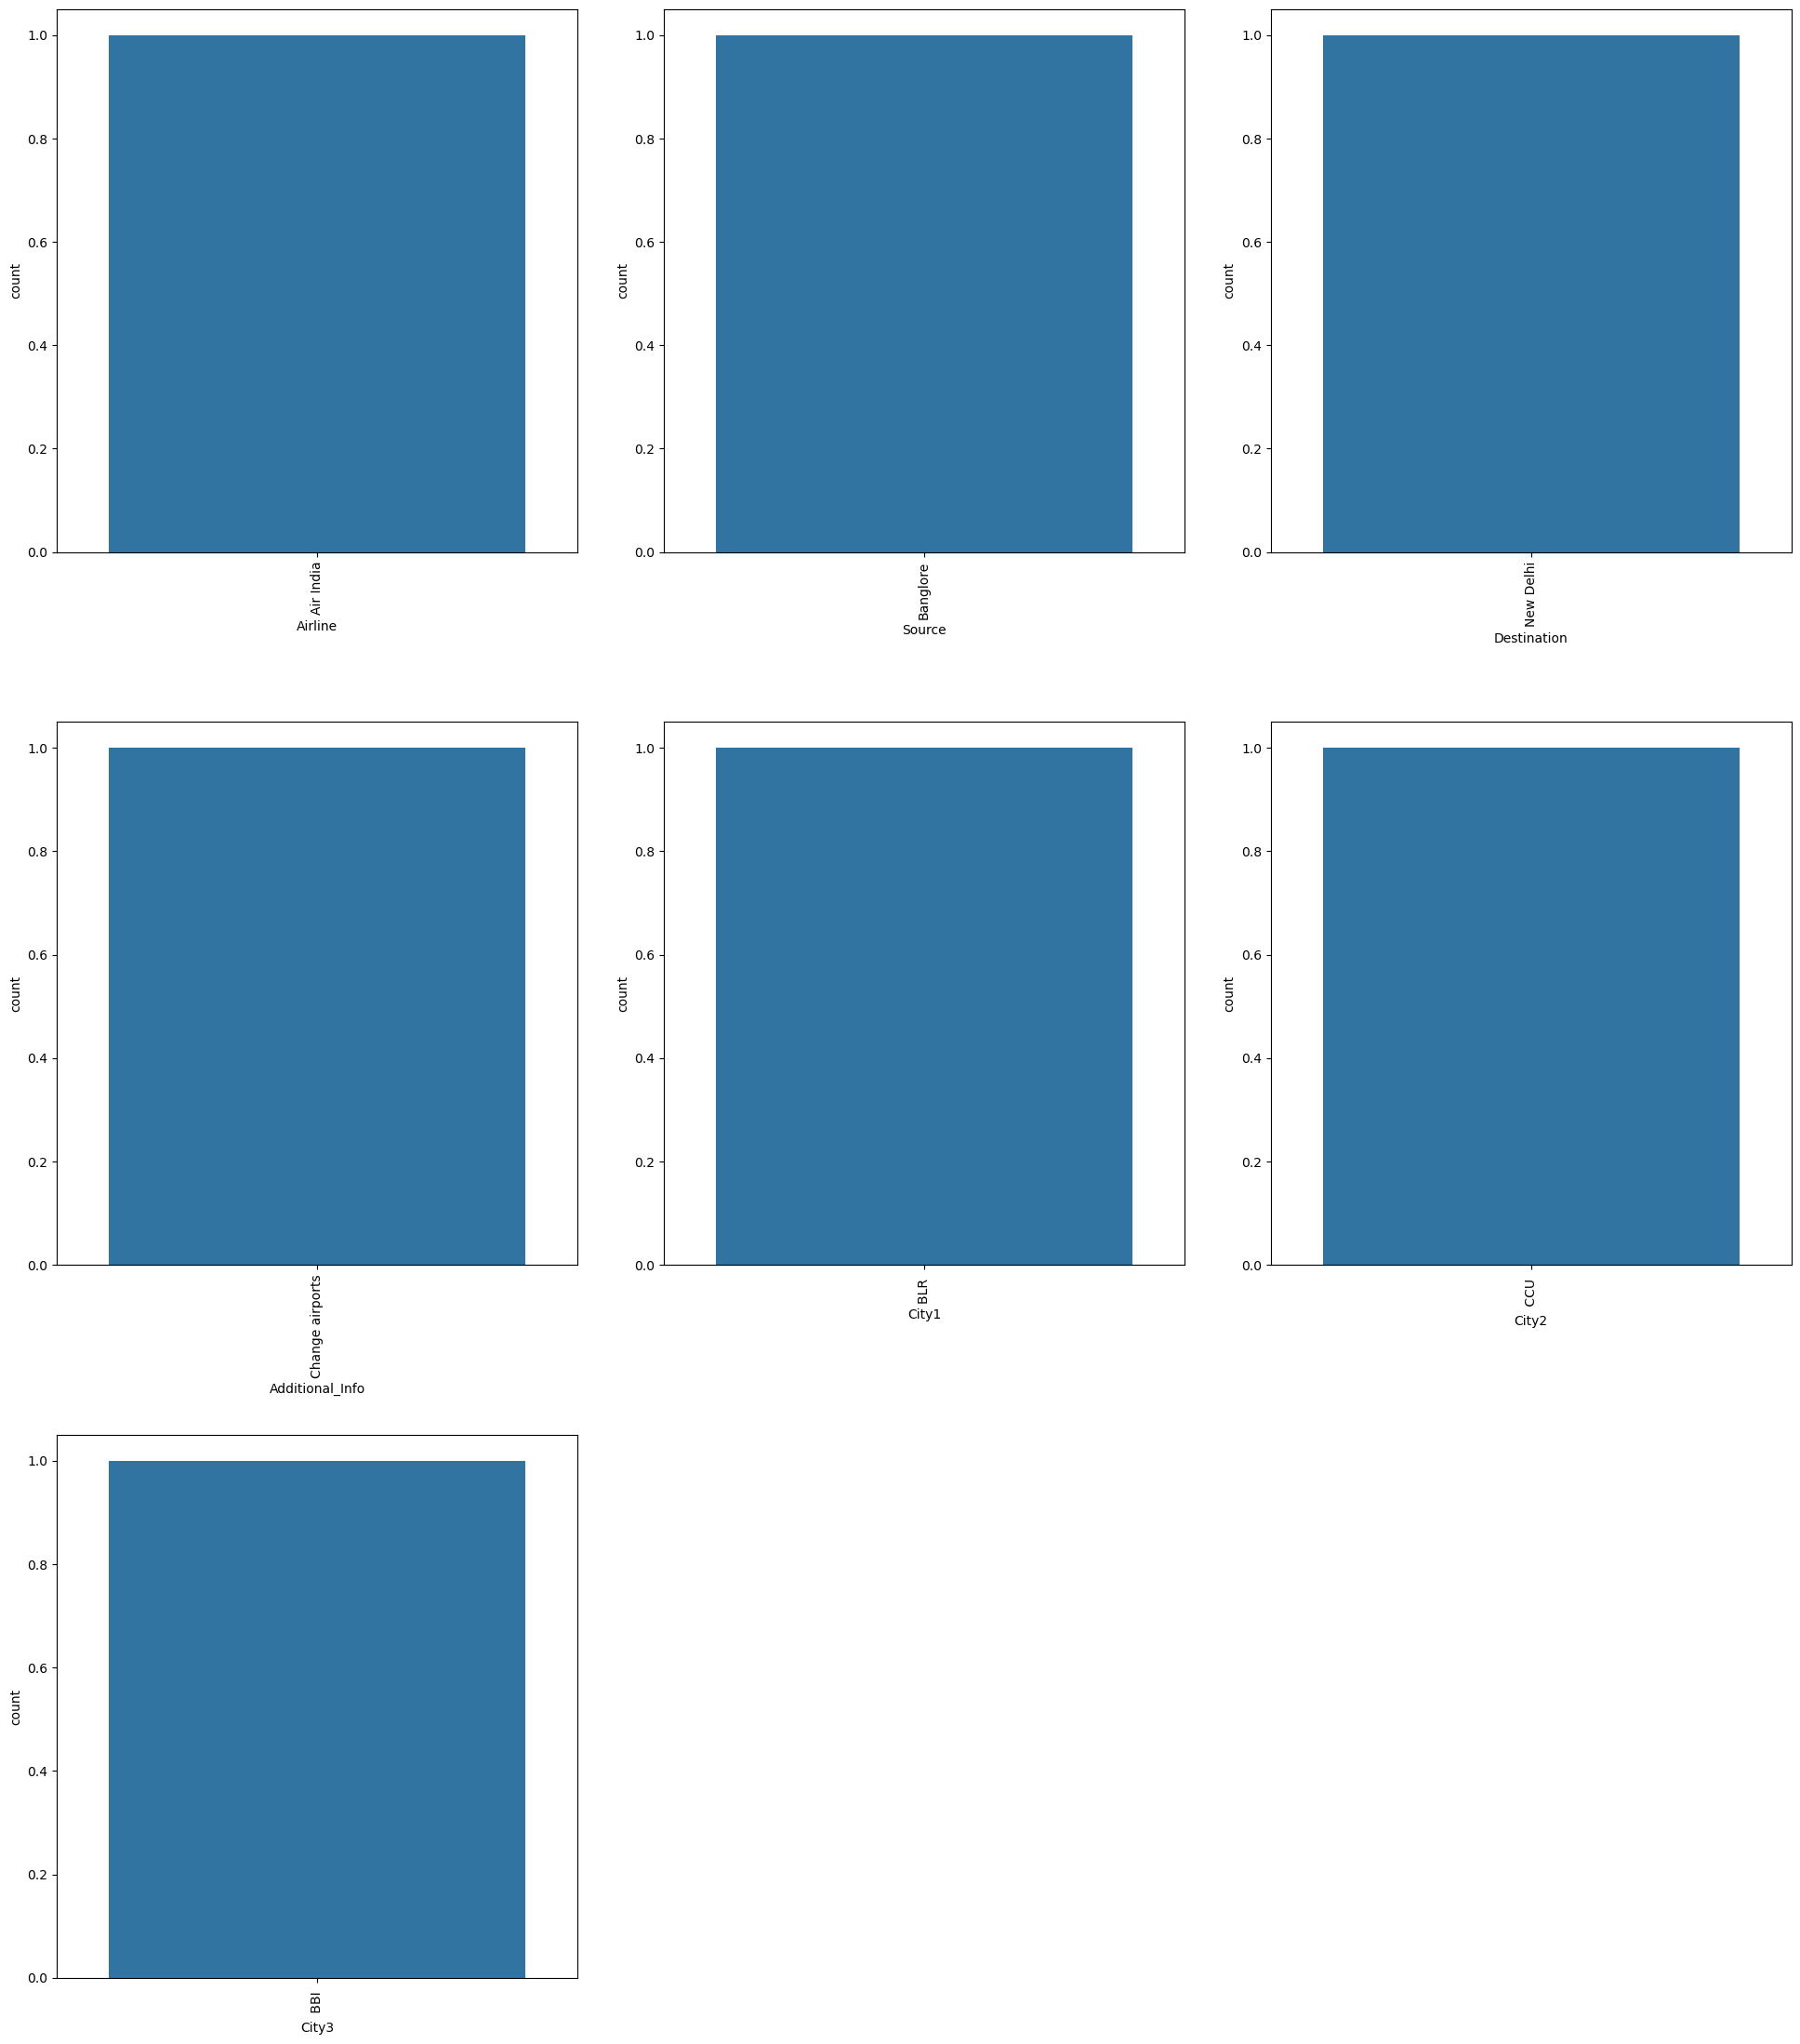

In [50]:
c = 1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

# Model Building Using LR

In [ ]:
x = dataset['Duration']
y = dataset['Price']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.7,  test_size = 0.3, random_state =100)

In [ ]:
dataset = dataset.astype({'Duration': float})


In [ ]:
x_train.head()

In [ ]:
y_train.head()

# Building a Linear Model (Add a constant to get an intercept & Ordinary Least Squares)

In [ ]:
import statsmodels.api as sm

In [ ]:
dataset_array = dataset.to_numpy()
print(dataset_array)

In [ ]:
dataset = dataset.astype({'Airline': float})
print(df.dtypes)

# Extract the ticket prices

In [ ]:
y = dataset['Price'].values

# Create a feature matrix

In [ ]:
X = dataset.index.values.reshape(-1, 1)


# Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


# Predict the ticket prices for the test set

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean error

In [ ]:

print('Mean squared error:', mse)